## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head(100)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [6]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.duplicated(subset = ['Mouse ID','Timepoint'] , keep=False)
DupMice = merge_df[merge_df.duplicated(subset = ['Mouse ID','Timepoint'] , keep=False)]
DupMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
#merge_df.duplicated(subset = ['Mouse ID','Timepoint'] , keep=False)
#cleanMerge2 = merge_df[merge_df.duplicated(subset = ['Mouse ID','Timepoint'] , keep=False)]
#merge_df['Mouse ID'] != "g989"
#DupMiceID = cleanMerge2['Mouse ID'].value_counts().reset_index()
#DupMiceID['Index'].value

In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMerge = merge_df[merge_df['Mouse ID'] != "g989"]

In [4]:
# Checking the number of mice in the clean DataFrame.
cleanMerge['Mouse ID'].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleanMerge.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
cleanMergeGroup = cleanMerge.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Count = cleanMergeGroup['Tumor Volume (mm3)'].count()
Mean = cleanMergeGroup['Tumor Volume (mm3)'].mean()
Median = cleanMergeGroup['Tumor Volume (mm3)'].median()
Variance = cleanMergeGroup['Tumor Volume (mm3)'].var()
StDev = cleanMergeGroup['Tumor Volume (mm3)'].std()
SEM = cleanMergeGroup['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
TumorVolumeSummary= pd.DataFrame({"RowCount": Count,
                      "Mean": Mean,
                      "Median": Median,           
                      "Variance": Variance,
                      "Standard Deviation":StDev,
                      "SEM":SEM})

TumorVolumeSummary


,RowCount,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

cleanMergeGroup.agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']}) 
 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Count of Measurements')

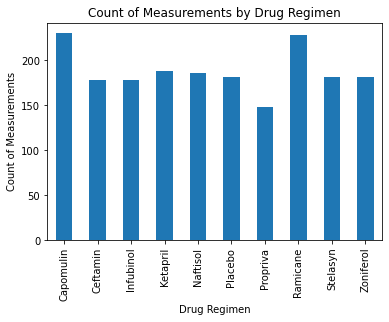

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_measurements = cleanMergeGroup['Drug Regimen'].count()
count_chart = count_measurements.plot(kind = 'bar',title="Count of Measurements by Drug Regimen")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count of Measurements")


Text(0, 0.5, 'Number of Measurements')

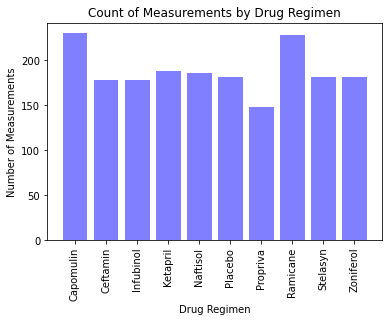

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#DrugList = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
#Measurements = [230,178,178,188,186,181,148,228,181,182]

CleanMergeGroupCount = cleanMerge.groupby(['Drug Regimen']).count().reset_index()

x_axis = np.arange(len(cleanMergeGroup['Drug Regimen'].count()))
plt.bar(CleanMergeGroupCount['Drug Regimen'].values, cleanMergeGroup['Drug Regimen'].count(), color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, CleanMergeGroupCount['Drug Regimen'].values,rotation = 90)
plt.title("Count of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")



In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_metadata['Sex'].value_counts()


Male      125
Female    124
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1b50acda9d0>,
 [Text(-0.7017365844029831, -0.8470925369228767, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.3827654096743544, -0.4620504746852054, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

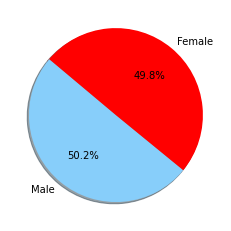

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
sizes = [125,124]
colors = ["lightskyblue","red"]
plt.pie(sizes,  labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
MouseTimepoint= cleanMerge[['Mouse ID','Timepoint']]
MouseTimepointGroup = MouseTimepoint.groupby("Mouse ID")
Max = MouseTimepointGroup.max()
Max = Max.reset_index()
MouseTimepointGroup.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
MouseTimepointMerge = pd.merge(Max, cleanMerge, on=("Mouse ID","Timepoint"))




In [42]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Vol = []


    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
for i in Treatments:
    LoopDF = MouseTimepointMerge[MouseTimepointMerge['Drug Regimen'] == i]
    vol = LoopDF['Tumor Volume (mm3)']

    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"{i}:The lower quartile of vol is: {lowerq}")
    print(f"{i}:The upper quartile of vol is: {upperq}")
    print(f"{i}:The interquartile range of vol is: {iqr}")
    print(f"{i}:The the median of Vol data is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{i}:Values below {lower_bound} could be outliers.")
    print(f"{i}:Values above {upper_bound} could be outliers.")
    

Capomulin:The lower quartile of vol is: 32.37735684
Capomulin:The upper quartile of vol is: 40.1592203
Capomulin:The interquartile range of vol is: 7.781863460000004
Capomulin:The the median of Vol data is: 38.125164399999996 
Capomulin:Values below 20.70456164999999 could be outliers.
Capomulin:Values above 51.83201549 could be outliers.
Ramicane:The lower quartile of vol is: 31.56046955
Ramicane:The upper quartile of vol is: 40.65900627
Ramicane:The interquartile range of vol is: 9.098536719999998
Ramicane:The the median of Vol data is: 36.56165229 
Ramicane:Values below 17.912664470000003 could be outliers.
Ramicane:Values above 54.30681135 could be outliers.
Infubinol:The lower quartile of vol is: 54.04860769
Infubinol:The upper quartile of vol is: 65.52574285
Infubinol:The interquartile range of vol is: 11.477135160000003
Infubinol:The the median of Vol data is: 60.16518046 
Infubinol:Values below 36.83290494999999 could be outliers.
Infubinol:Values above 82.74144559000001 could 

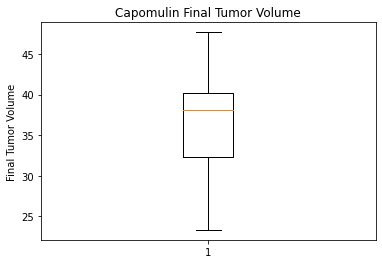

The lower quartile of Capomulin vol is: 32.37735684
The upper quartile of vol is: 40.1592203
The interquartile range of vol is: 7.781863460000004
The the median of Vol data is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


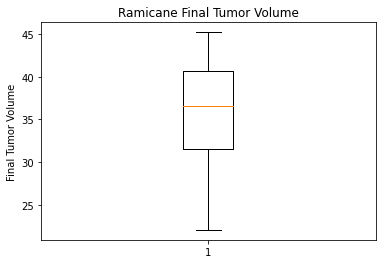

The lower quartile of Ramicane vol is: 31.56046955
The upper quartile of vol is: 40.65900627
The interquartile range of vol is: 9.098536719999998
The the median of Vol data is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


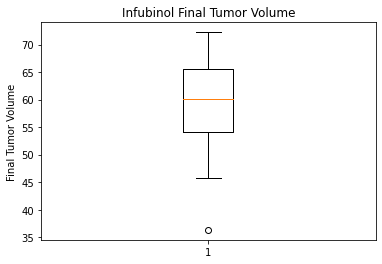

The lower quartile of Infubinol vol is: 54.04860769
The upper quartile of vol is: 65.52574285
The interquartile range of vol is: 11.477135160000003
The the median of Vol data is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


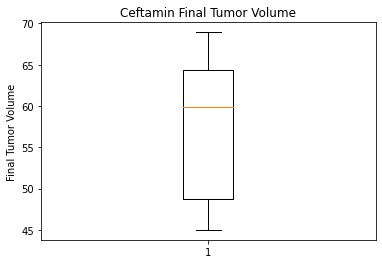

The lower quartile of Ceftamin vol is: 48.72207785
The upper quartile of vol is: 64.29983003
The interquartile range of vol is: 15.577752179999997
The the median of Vol data is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for i in Treatments:
    loopdf = MouseTimepointMerge[MouseTimepointMerge['Drug Regimen'] == i]
    vol = loopdf['Tumor Volume (mm3)']

    fig1, ax1 = plt.subplots()
    ax1.set_title(f"{i} Final Tumor Volume")
    ax1.set_ylabel('Final Tumor Volume')
    ax1.boxplot(vol)
    plt.show()


    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {i} vol is: {lowerq}")
    print(f"The upper quartile of vol is: {upperq}")
    print(f"The interquartile range of vol is: {iqr}")
    print(f"The the median of Vol data is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

## Line and Scatter Plots

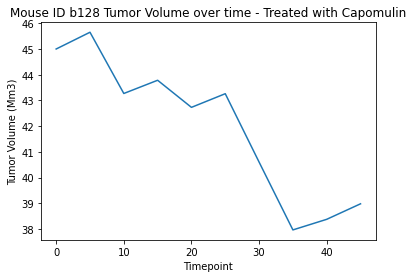

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
MouseDF = cleanMerge[cleanMerge['Mouse ID'] == 'b128']
MouseDF.head()

data = MouseDF['Tumor Volume (mm3)'].to_list()
data

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = MouseDF['Timepoint'].to_list()

# Create a random array of data that we will use for our y values
data = MouseDF['Tumor Volume (mm3)'].to_list()

plt.plot(x_axis, data)
plt.title("Mouse ID b128 Tumor Volume over time - Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (Mm3)")
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
